In [13]:
import hddm
import pandas as pd
import matplotlib.pyplot as plt
import os
path = '/Users/Krista/Documents/github_repositories/testing-master/'

In [14]:
os.chdir(path)
os.getcwd()

'/Users/Krista/Documents/github_repositories/testing-master'

In [15]:
data = hddm.load_csv('./1000t.csv')
data.columns = data.columns.str.strip()
data.head(4)
data.tail(4)
data.describe()

,rt,response,gen_drift,gen_bound,subj_idx
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.394642,0.556195,0.863054,0.746209,24.500000
std,0.177479,0.496833,0.268400,0.364673,14.430906
min,0.002000,0.000000,0.000019,0.251597,0.000000
25%,0.262000,0.000000,0.899079,0.555713,12.000000
50%,0.332000,1.000000,1.000000,0.600718,24.500000
75%,0.522000,1.000000,1.000000,0.728101,37.000000
max,0.700000,1.000000,1.000000,2.499951,49.000000


In [16]:
data[data.cond == "lc"].gen_drift.mean(), data[data.cond == "hc"].gen_drift.mean()

(0.89639766142651245, 0.83969187065611706)

In [58]:
data[data.cond == "lv"].gen_drift.mean(), data[data.cond == "hv"].gen_drift.mean()

(0.88752119226056458, 0.82860508520752596)

In [59]:
data[data.cond == "lc"].gen_bound.mean(), data[data.cond == "hc"].gen_bound.mean()

(0.70363880027137449, 0.74453703577596608)

In [17]:
data[data.cond == "lv"].gen_bound.mean(), data[data.cond == "hv"].gen_bound.mean()

(0.6720319308568603, 0.86462955821356535)

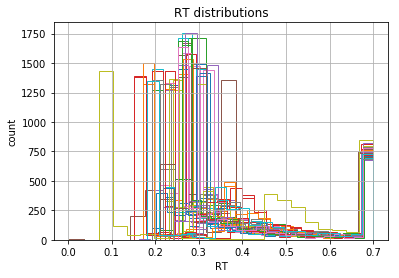

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [19]:
comb_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond', 'a':'cond'},
                        include=['v'], p_outlier=0.05)
comb_stim.find_starting_values()
comb_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1293.7 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [20]:
drift_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond'},
                        include=['v'], p_outlier=0.05)
drift_stim.find_starting_values()
drift_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1010.3 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [21]:
bound_stim = hddm.HDDM(data, bias=False, depends_on={'a':'cond'},
                        include=['a'], p_outlier=0.05)
bound_stim.find_starting_values()
bound_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 886.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [65]:
comb_stats = comb_stim.gen_stats()
drift_stats = drift_stim.gen_stats()

comb_v = comb_stats[comb_stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]
drift_v = drift_stats[drift_stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]

comb_v, drift_v

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


(             mean        std       2.5q        25q         50q         75q  \
 v(hc)   0.0669162  0.0134154  0.0403321  0.0578597   0.0669725   0.0763685   
 v(hv) -0.00428857  0.0123615 -0.0279831 -0.0119585 -0.00459743  0.00383555   
 v(lc)    0.551843  0.0139085   0.524328   0.541859    0.551807    0.561239   
 v(lv)    0.447704  0.0149954   0.416266   0.438406     0.44835    0.457574   
 
            97.5q       mc err  
 v(hc)   0.093459  0.000732922  
 v(hv)  0.0204992  0.000644713  
 v(lc)   0.577955  0.000816067  
 v(lv)   0.478278  0.000874351  ,
              mean        std       2.5q        25q        50q         75q  \
 v(hc)   0.0657708  0.0147958  0.0362288  0.0552691  0.0661085   0.0757669   
 v(hv) -0.00307113  0.0134429 -0.0293977  -0.012048 -0.0029857  0.00637125   
 v(lc)    0.575465  0.0156925   0.546704   0.564503   0.575063    0.586206   
 v(lv)    0.485194  0.0152809   0.455035   0.474789   0.485006    0.495141   
 
            97.5q       mc err  
 v(hc)  0.09

In [ ]:
a = comb_stats[comb_stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)'])]


In [12]:
m_stim.plot_posteriors('a', 'v')

NameError: name 'm_stim' is not defined

In [ ]:
v_lc, v_hc = comb_stim.nodes_db.node[['v(lc)', 'v(hc)']]
v_lv, v_hv = comb_stim.nodes_db.node[['v(lv)', 'v(hv)']]
a_lv, a_hv = comb_stim.nodes_db.node[['a(lv)', 'a(hv)']]
a_lc, a_hc = comb_stim.nodes_db.node[['a(lc)', 'a(hc)']]

In [ ]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of drift-rate group means')
plt.savefig('1000t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of drift-rate group means')
plt.savefig('1000t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc, a_hc])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of decision boundary group means')
plt.savefig('1000t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of decision boundary group means')
plt.savefig('1000t_bound_vol.pdf')


In [ ]:
# print("P(low_conflict_drift > high_conflict_drift) = ", (v_hc.trace() > v_lc.trace()).mean())
# print("P(low_conflict_bound > high_conflict_bound) = ", (a_hc.trace() > a_lc.trace()).mean())
# print("P(high_volatility_bound > low_volatility_bound) = ", (a_hv.trace() > a_lv.trace()).mean())
# print("P(high_volatility_drift > low_volatility_drift) = ", (v_hv.trace() > v_lv.trace()).mean())

In [ ]:
#for when i fit a null model 
print("Stimulus model DIC: %f" % m_stim.dic)

In [ ]:
#model does not save... db is 'ram' error
# m_stim.save('1000t')

combined model DIC: 22437.580444
drift model DIC: 31732.815273
bound model DIC: 24765.754624


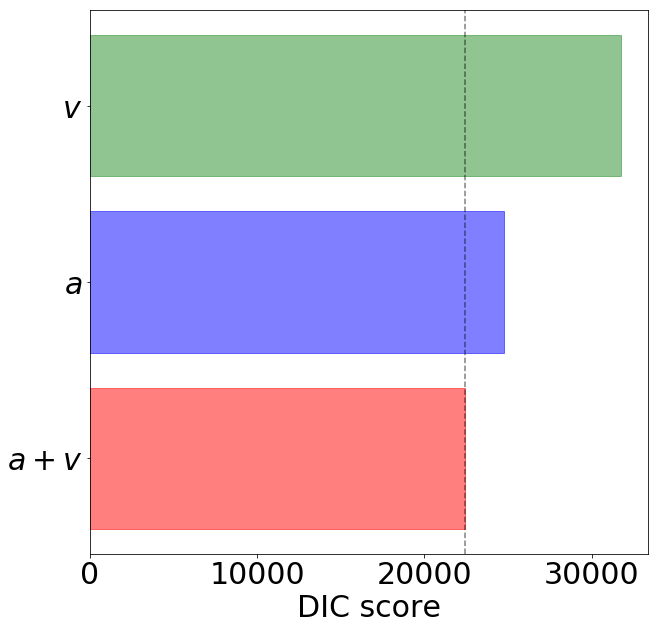

In [25]:
#for when i fit alternative models

fig_path = '/Users/Krista/Dropbox/volatileValues/m_plots/'

print("combined model DIC: %f" % comb_stim.dic)
print("drift model DIC: %f" % drift_stim.dic)
print("bound model DIC: %f" % bound_stim.dic)

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

names = [r'$a + v$',r'$a$',r'$v$']
dics = [comb_stim.dic,  bound_stim.dic, drift_stim.dic]
bars = plt.barh(names,dics, alpha=0.5)
plt.xlabel('DIC score')

bars[0].set_color('r')
bars[1].set_color('blue')
bars[2].set_color('forestgreen')

plt.axvline(comb_stim.dic, color='k', alpha=0.5, linestyle = '--')
plt.savefig(fig_path+'1000t_DIC.pdf')

In [54]:
import numpy as np
dics = np.hstack(np.matrix((comb_stim.dic,  bound_stim.dic,  drift_stim.dic)))
# np.diff(dics)
header = ('combined_dic, a_dic, v_dic')
np.savetxt('1000t_DICs.csv', dics, header = header, delimiter=',', comments='')

(1, 3)

In [26]:
 comb_stim.print_stats('./1000t_comb_stats.csv')
 drift_stim.print_stats('./1000t_drift_stats.csv')
 bound_stim.print_stats('./1000t_bound_stats.csv')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
